In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
#about the data - we will be analysing the spread of covid - 19 among the the different states of US 
#The data we have is for 21th May 2020.
data = pd.read_csv('covid.csv')
data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [3]:
print('Shape of our data set rows and columns :', data.shape)

Shape of our data set rows and columns : (58, 18)


In [4]:
#checking missing values in our data
data.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

I will be removing Diamond Princess and Grand Princess and American Samoa index (0,9,2 by row) from our data set, as I don't see any useful insigts for visualisation, and will be removing columns People_Hospitalized and Hospitalization_Rate by column as there are many missing values.

In [5]:
data.drop(index=[9,13,2],axis=0,inplace=True)

In [6]:
data.drop(['People_Hospitalized','Hospitalization_Rate'],axis=1,inplace=True)

In [7]:
data.reset_index(drop=True)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,3.999387,84000001,USA,3353.942386
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,2.493766,84000002,USA,5063.940017
2,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,5.011405,84000004,USA,2272.859351
3,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,2.138717,84000005,USA,3189.670370
4,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,4.066421,84000006,USA,3492.893832
5,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,5.698118,84000008,USA,2289.339188
6,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,9.044775,84000009,USA,5349.302875
7,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,3.783256,84000010,USA,4663.552976
8,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1059.0,6085.0,11,1069.927127,40419.0,5.390015,84000011,USA,5727.106946
9,Florida,US,2020-05-21 02:32:54,27.7663,-81.6868,47471,2096,NaN,45375.0,12,221.024217,771348.0,4.415327,84000012,USA,3591.383953


In [8]:
#we can see that there are some columns with missing values. 1st I will fill up the missing values in Recoverd column:
#filling the missing values in Recovered column
data['Recovered'] = data['Confirmed'] - data['Deaths'] - data['Active']
data.fillna(0)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,3.999387,84000001,USA,3353.942386
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,2.493766,84000002,USA,5063.940017
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,5.011405,84000004,USA,2272.859351
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,2.138717,84000005,USA,3189.670370
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,4.066421,84000006,USA,3492.893832
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,5.698118,84000008,USA,2289.339188
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,9.044775,84000009,USA,5349.302875
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,3.783256,84000010,USA,4663.552976
10,District of Columbia,US,2020-05-21 02:32:54,38.8974,-77.0268,7551,407,1059.0,6085.0,11,1069.927127,40419.0,5.390015,84000011,USA,5727.106946
11,Florida,US,2020-05-21 02:32:54,27.7663,-81.6868,47471,2096,0.0,45375.0,12,221.024217,771348.0,4.415327,84000012,USA,3591.383953


In [9]:
data.isnull().sum()

Province_State    0
Country_Region    0
Last_Update       0
Lat               0
Long_             0
Confirmed         0
Deaths            0
Recovered         0
Active            0
FIPS              0
Incident_Rate     0
People_Tested     0
Mortality_Rate    0
UID               0
ISO3              0
Testing_Rate      0
dtype: int64

# Visualisation of confirmed, active, death and recoverd cases by states in descending order

In [10]:
sorted_by_confirmed = data.sort_values('Confirmed',axis=0,ascending=False)
sorted_by_active = data.sort_values('Active',axis=0,ascending=False)
sorted_by_death = data.sort_values('Deaths',axis=0,ascending=False)
sorted_by_recovered = data.sort_values('Recovered',axis=0,ascending=False)

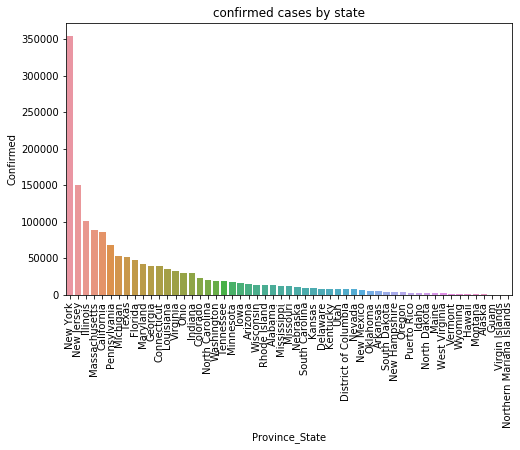

In [11]:
#plotting of confirmed cases by state
plt.figure(figsize=(8,5))
sns.barplot(x='Province_State',y='Confirmed',data=sorted_by_confirmed)
plt.xticks(rotation=90)
plt.title('confirmed cases by state')
plt.show()

from the above bar plot we can see that New York was having the most number of confirmed cases followed by New Jersy , where as American Samoa was at the least, reason being American samoa is an island with less hpopulation and distant from Amerca's major cities.

In [12]:
#creating a new column of confirmed rate wrt to people tested
data['Confirmed_Rate'] = data['Confirmed']*100/data['People_Tested']

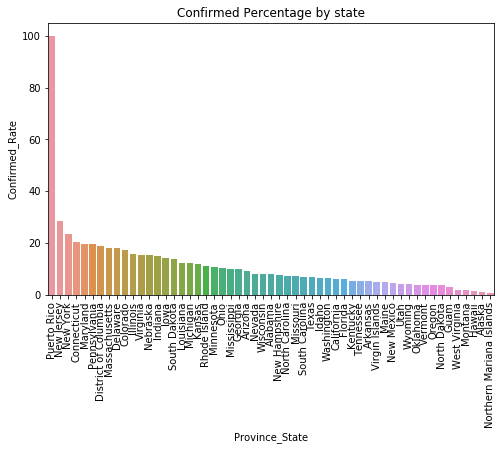

In [13]:
#plotting confirmed rate with respect to People_tested by state.
plt.figure(figsize=(8,5))
sns.barplot(x='Province_State',y='Confirmed_Rate',data=data.sort_values('Confirmed_Rate',ascending=False))
plt.xticks(rotation=90)
plt.title('Confirmed Percentage by state')
plt.show()

here we can see that in Puerto Rico every indivisual who was tested was positive.
In New Jersey and New York, confirmed rate was between 20-25%.
In Northern Mariana Islands the confirmed rate was minimum

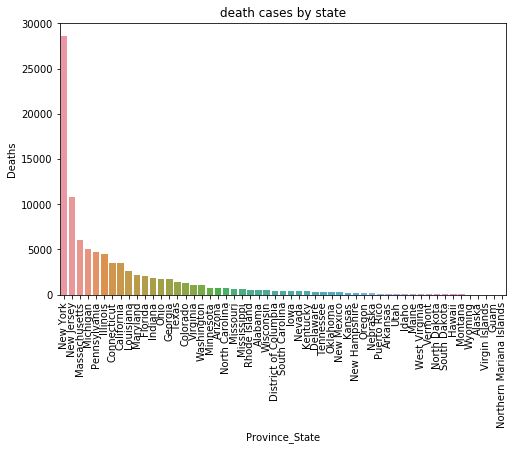

In [14]:
#plotting Death numbers by state.
plt.figure(figsize=(8,5))
sns.barplot(x='Province_State',y='Deaths',data=sorted_by_death)
plt.xticks(rotation=90)
plt.title('death cases by state')
plt.show()

Again we can see that New York was having the most number of Death cases followed by New Jersy , where as American Samoa was at the least, reason being American samoa is an island with less hpopulation and distant from Amerca's major cities.

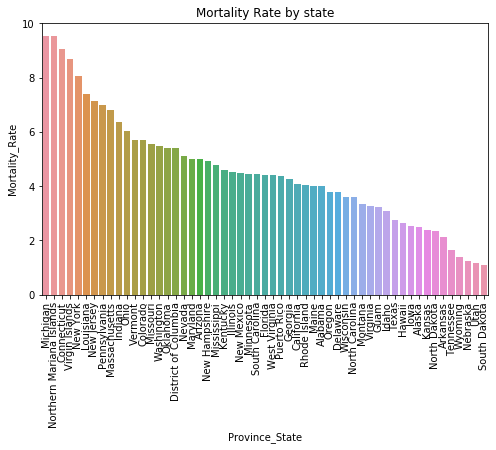

In [15]:
#plotting of mortality rate/ death rate by states.
plt.figure(figsize=(8,5))
sns.barplot(x='Province_State',y='Mortality_Rate',data=data.sort_values('Mortality_Rate',ascending=False))
plt.xticks(rotation=90)
plt.title('Mortality Rate by state')
plt.show()

Michigan and Northern Mariana Island was having the high Mortality Rate followed by Northern Marina Island, both were at approx 9.5 %., South Dakota was having the lowest mortalit rate due to Covid -19.

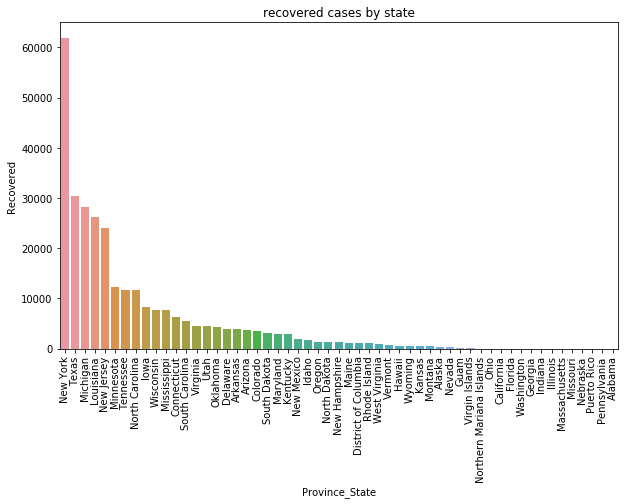

In [16]:
#plotting recovered numbers by states
plt.figure(figsize=(10,6))
sns.barplot(x='Province_State',y='Recovered',data=sorted_by_recovered)
plt.xticks(rotation=90)
plt.title('recovered cases by state')
plt.show()

The recovery in newyork was maximum followed by other big cities Texas,Michigan, Luisiana, New Jersey.
we will be looking at the Recovery rate by each state 

In [17]:
#creating a new column of Recovery Rate wrt to confirmed cases.
data['Recover_Rate'] = data['Recovered']*100 / data['Confirmed']

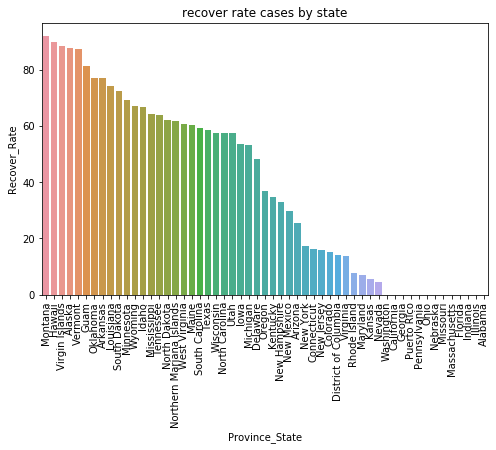

In [18]:
#plotting recovery rate by state with respect to confirmed cases
plt.figure(figsize=(8,5))
sns.barplot(x='Province_State',y='Recover_Rate',data=data.sort_values('Recover_Rate',ascending=False))
plt.xticks(rotation=90)
plt.title('recover rate cases by state')
plt.show()

now we see a diff in recovery rate, earlier new york shows the highest number of recovery, however if we look at the recovery rate new york is showing below 20%, Montana, hawai, Virgin Island , Alaska, Veromnt were having higher recovery rate.

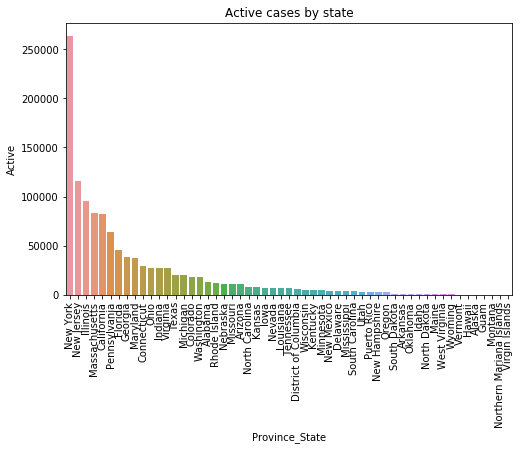

In [19]:
#plotting Active cases by state
plt.figure(figsize=(8,5))
sns.barplot(x='Province_State',y='Active',data=sorted_by_active)
plt.xticks(rotation=90)
plt.title('Active cases by state')
plt.show()

Rise in the active cases due to rise in confirmed cases were very high in New York City

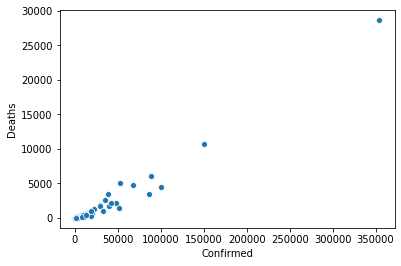

In [20]:
#checking the relation ship of confirmed cases and Deaths.
sns.scatterplot(x='Confirmed',y='Deaths',data=data)

here we can see a positive linear relation, as the confirmed cases is rising the death rate is also increasing.

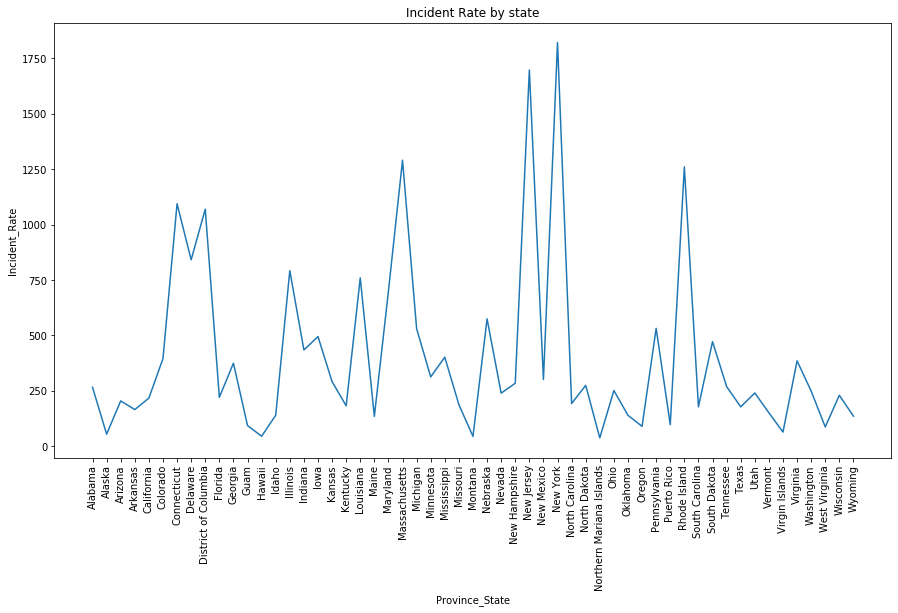

In [21]:
#checking of Incident rate state wise.
plt.figure(figsize=(15,8))
sns.lineplot(x='Province_State',y='Incident_Rate',data=data)
plt.xticks(rotation=90)
plt.title('Incident Rate by state')
plt.show()

here we can see that the insident rate in New York and New Jersy was maximum

In [22]:
data.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,Testing_Rate,Confirmed_Rate,Recover_Rate
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,5.500000e+01,55.000000,55.000000,55.000000
mean,37.769382,-83.662516,28212.745455,1698.836364,5351.127273,21162.781818,32.036364,403.435002,2.299576e+05,4.567409,7.789098e+07,3960.938317,11.235692,38.659593
std,8.453768,48.840127,53614.101223,4178.550115,10607.048455,42148.607793,18.878720,402.735419,2.999399e+05,2.074273,2.201472e+07,1884.729897,13.717289,32.025881
min,13.444300,-157.498300,21.000000,2.000000,0.000000,2.000000,1.000000,38.082112,1.383000e+03,1.101269,3.160000e+02,97.702058,0.550170,0.000000
25%,34.905100,-99.611400,3834.500000,98.500000,37.000000,1076.000000,17.500000,158.533760,4.859600e+04,3.256718,8.400001e+07,2752.080259,4.934943,5.054021
50%,39.063900,-86.902300,11528.000000,407.000000,1275.000000,6324.000000,31.000000,251.824349,1.422460e+05,4.415327,8.400003e+07,3492.893832,7.936759,36.990266
75%,42.493100,-76.914450,31172.000000,1561.500000,4473.000000,19810.500000,45.500000,483.617754,2.817865e+05,5.508969,8.400004e+07,4863.746497,14.529899,64.090574
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,78.000000,1821.620216,1.505836e+06,9.545549,8.400006e+07,11377.424693,100.000000,92.050209


here we can look at statistical distribution of our data, and it seems that there are outliers in Confirmed, Deaths,Recovered, Active cases, Incident Rate,Testing Rate as we can see huge diff between the minumum- maximum value and 25th-75th quantile respectivel.
However removing the outliers will not be a good approach, The data is sensitive to be deleted.

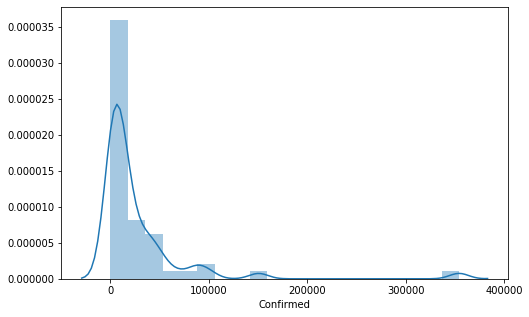

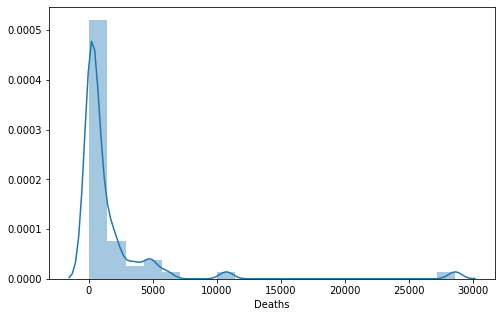

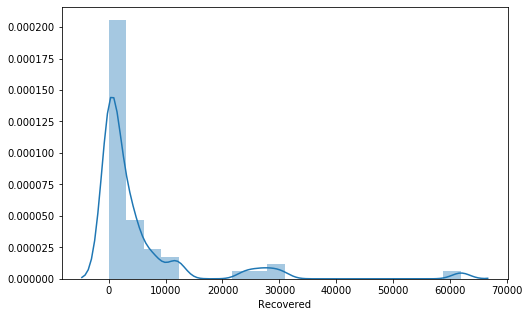

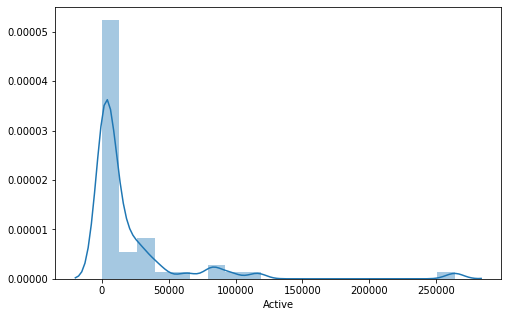

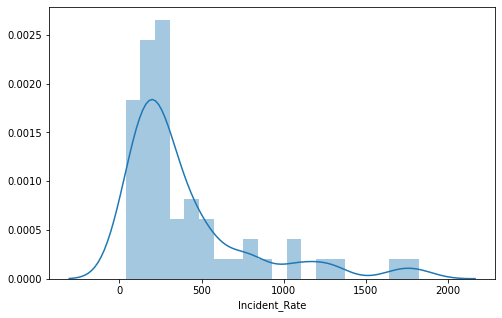

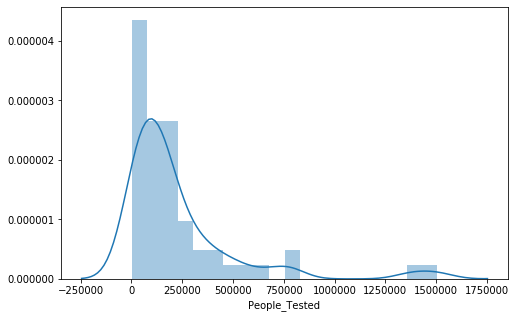

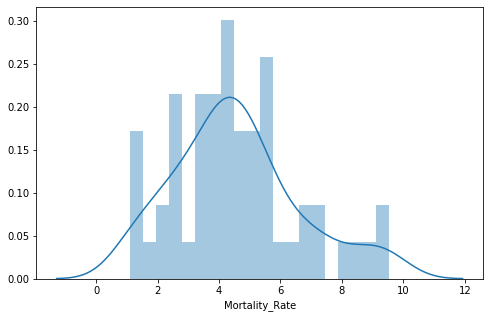

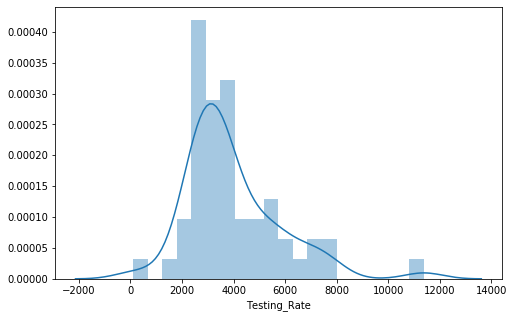

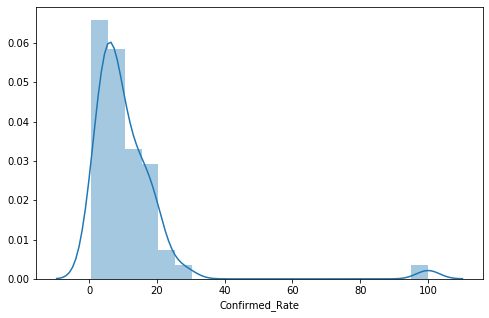

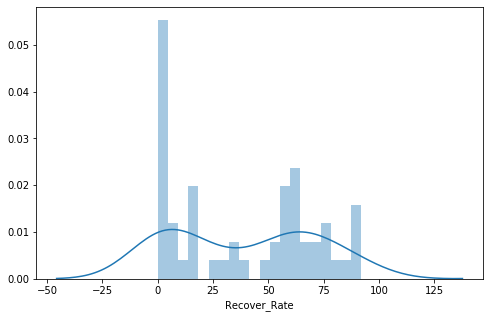

In [27]:
#plotting univariate histogram
#creating an object that includes only numerical variables

num_var = ['Confirmed','Deaths','Recovered','Active','Incident_Rate','People_Tested','Mortality_Rate','Testing_Rate',
          'Confirmed_Rate','Recover_Rate']

#now with loop I will be lotting the histogram for num_var
for i in num_var:
    plt.figure(figsize=(8,5))
    sns.distplot(data[i],bins=20)
    plt.show()

Here we can see that except Mortality rate and recovery rate all other features are skewed to right.
skweness doess shows the presence of outliers, I will use zscore to look at the outliers.

In [29]:
data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,Mortality_Rate,UID,ISO3,Testing_Rate,Confirmed_Rate,Recover_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,3.999387,84000001,USA,3353.942386,7.936759,0.000000
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,2.493766,84000002,USA,5063.940017,1.082467,87.780549
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,5.011405,84000004,USA,2272.859351,9.010185,25.311955
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,2.138717,84000005,USA,3189.670370,5.197490,76.993804
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,0.0,82500.0,6,217.646575,1380120.0,4.066421,84000006,USA,3492.893832,6.231125,0.000000


In [30]:
#need to remove some feature to get z-score values of our data
data_num = data.drop(['Province_State','Country_Region','Last_Update','UID','ISO3'],axis=1)


In [31]:
from scipy.stats import zscore

z = np.abs(zscore(data_num))

In [32]:
threshold = 3
print(np.where(z>3))

(array([ 4, 11, 31, 33, 33, 33, 33, 33, 33, 36, 41, 42], dtype=int64), array([ 8,  1,  7,  2,  3,  4,  5,  7,  8,  1, 11, 10], dtype=int64))


In [34]:
data_new = data_num[(z<3).all(axis = 1)]
data_new.shape

(48, 13)

In [35]:
data.shape

(55, 18)

Above we can see that when the outliers were deleted the observation remaining were 48.
However, removing the data will not be a good approach, as if we will be predicting the cases for future, we will be requiring each day,month cases of each state.

Here I am Analysing the data which was recorded only on 21st May 2020.

In [37]:
#checkig skewness
data_new.skew()

Lat              -0.237406
Long_            -1.382800
Confirmed         1.865464
Deaths            2.027727
Recovered         2.618491
Active            2.404263
FIPS              0.355251
Incident_Rate     1.598918
People_Tested     1.787121
Mortality_Rate    0.550512
Testing_Rate      1.077998
Confirmed_Rate    0.528040
Recover_Rate     -0.024680
dtype: float64

In [38]:
#we can see that their is skewness except Mortality rate as we have discussed above when we were looking at the distplot, 
#a lot of positive skewness is there, We can also see that the values in each column were in diff Sclae, so I will try using 
#minmax scaler and then check the skewness
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
data_new_mms= mms.fit_transform(data_new)




In [40]:
data_new_mms = pd.DataFrame(data_new_mms)

In [41]:
data_new_mms.skew()

0    -0.237406
1    -1.382800
2     1.865464
3     2.027727
4     2.618491
5     2.404263
6     0.355251
7     1.598918
8     1.787121
9     0.550512
10    1.077998
11    0.528040
12   -0.024680
dtype: float64

In [43]:
#using the log transformation to reduce the skewness of unscaled data

for col in data_new.columns:
    if data_new[col].skew()>0.55 or data_new[col].skew()<0.55:
        data_new[col]=np.log1p(data_new[col])

In [44]:
data_new.skew()

Lat              -1.446506
Long_                  NaN
Confirmed        -0.902203
Deaths           -0.420503
Recovered        -0.933351
Active           -1.195812
FIPS             -1.316006
Incident_Rate    -0.194169
People_Tested    -1.194840
Mortality_Rate   -0.469750
Testing_Rate      0.111089
Confirmed_Rate   -0.445282
Recover_Rate     -0.904342
dtype: float64

In [45]:
#using the log transformation to reduce the skewness of scaled data

for col in data_new_mms.columns:
    if data_new_mms[col].skew()>0.55 or data_new_mms[col].skew()<0.55:
        data_new_mms[col]=np.log1p(data_new_mms[col])

In [46]:
data_new_mms.skew()

0    -0.968698
1    -1.947362
2     1.450673
3     1.714401
4     2.209293
5     1.965297
6     0.015089
7     1.223226
8     1.361811
9     0.087970
10    0.721638
11    0.266128
12   -0.202586
dtype: float64

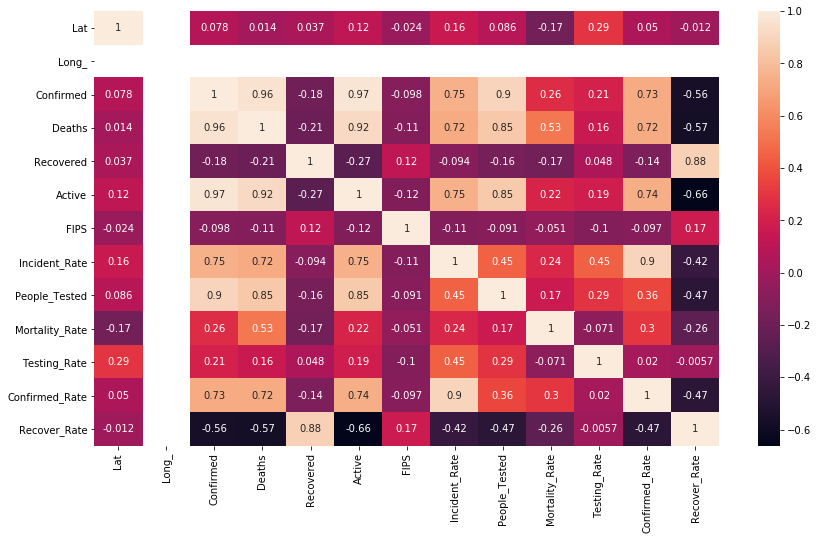

In [50]:
#Checking the correlation of variables of unscaled data
plt.figure(figsize=(14,8))
sns.heatmap(data_new.corr(),annot=True)
plt.show()

From the above correlation metrix we can see that the confirmed rate and Recovery rate are highly negativel correlated, Active and Recovery Rate is also negative correlelated, same with confirmed and Recovery rate.

Confirmed and People tested are highly positively correlated.
also positive correlation of Incident_Rate, Confirmed_Rate with Deaths and Active respectively


In [54]:
#Export files as modified version:
data_new.to_csv("train_modified.csv",index=False)